In [11]:
# could replace this with some standard ROS package, e.g. hector_geotiff looks good
import geopy
import geopy.distance

# Define starting point.
origin = geopy.Point(37.335118, -121.883843)
# Define azimuth
SPACE_AZIMUTH = 30

def translate_point(origin, dx, dy): # dx, dy in meters

    dist_x = geopy.distance.geodesic(meters = dx)
    dist_y = geopy.distance.geodesic(meters = dy)
    # move by x
    left_upper = dist_x.destination(point=origin, bearing=SPACE_AZIMUTH)
    # move by y
    dest = dist_y.destination(point=left_upper, bearing=SPACE_AZIMUTH+90)
    return dest

In [12]:
translate_point(origin, 0, 0) == origin

True

In [13]:
import numpy as np
points_metric = np.random.rand(30,2)*40 # generate 30 points in range (0-40)

In [14]:
points_geo = np.array([list(translate_point(origin, dx, dy)) for (dx, dy) in points_metric])

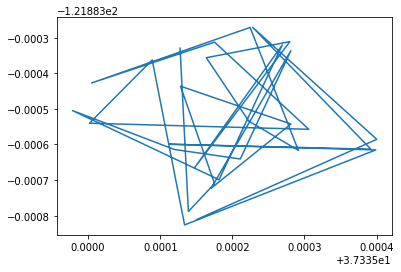

In [15]:
import matplotlib.pyplot as plt
plt.plot(points_geo[:,0],points_geo[:,1])
plt.show()

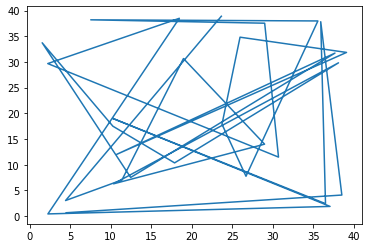

In [16]:
plt.plot(points_metric[:,0],points_metric[:,1])
plt.show()